In [49]:
# Use seaborn for pairplot.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.1


In [62]:
# Training dataset, ground truth: y = sin(x)
N=20
x = np.linspace(0, 2*np.pi, N)
y = np.sin(x)
dataset = pd.DataFrame({'x': x, 'y': y})

In [63]:
# Split into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

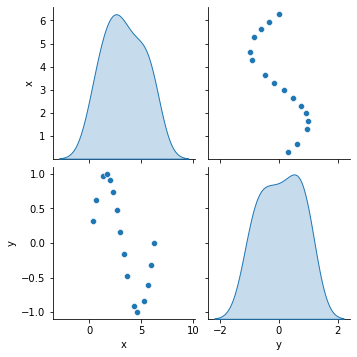

In [64]:
# Compare the distribution of x to y
sns.pairplot(train_dataset[['x', 'y']], diag_kind='kde')


In [65]:
# Check the overall statistics
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
x,16.0,3.306940,1.893927,0.330694,1.901490,3.141593,4.795062,6.283185
y,16.0,0.054247,0.696230,-0.996584,-0.510514,0.082297,0.644591,0.996584


In [66]:
# Separate the labels from the features
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')

In [67]:
# Define the model
input = layers.InputLayer(input_shape=(1,))

def build_and_compile_model(input):
  model = keras.Sequential([
    # norm,
    input,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [68]:
sin_model = build_and_compile_model(input)
# sin_model.summary()

In [76]:
%%time
history = sin_model.fit(
    train_features['x'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=2000)

CPU times: user 40.6 s, sys: 3.33 s, total: 43.9 s
Wall time: 40 s


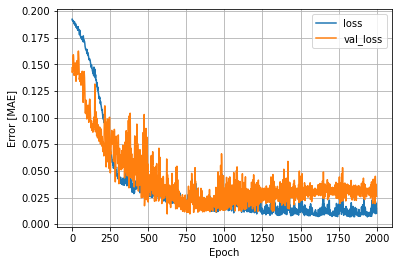

In [79]:
# Show loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MAE]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [80]:
# Get MAE on test dataset
test_results = {}

test_results['sin_model'] = sin_model.evaluate(
    test_features['x'],
    test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error [MAE]']).T


,Mean absolute error [MAE]
sin_model,0.097982


4/4 [==============================] - 0s 2ms/step


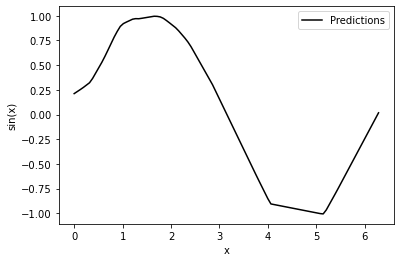

In [87]:
# Plot predictions for a full sin wave
def plot_prediction(x, y):
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('sin(x)')
  plt.legend()
  
x = np.linspace(0, 2*np.pi, 100)
y = sin_model.predict(x)

plot_prediction(x, y)